<a href="https://colab.research.google.com/github/Niloofar-SecML/CNN/blob/main/CNNproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [8]:
#load dataset
(train_ds, test_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.CGJM9B_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [9]:
IMG_SIZE = 128

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixels to [0, 1]
    return image, label

In [10]:
BATCH_SIZE = 32

train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [12]:
#build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
#train the model
history = model.fit(train_ds, validation_data=test_ds, epochs=5)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 678s 1s/step - accuracy: 0.5856 - loss: 0.6620 - val_accuracy: 0.7111 - val_loss: 0.5426
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 652s 1s/step - accuracy: 0.7602 - loss: 0.4928 - val_accuracy: 0.7878 - val_loss: 0.4471
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.8087 - loss: 0.4118 - val_accuracy: 0.8173 - val_loss: 0.4045
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.8463 - loss: 0.3489 - val_accuracy: 0.8237 - val_loss: 0.4167
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.8758 - loss: 0.2838 - val_accuracy: 0.8371 - val_loss: 0.4053


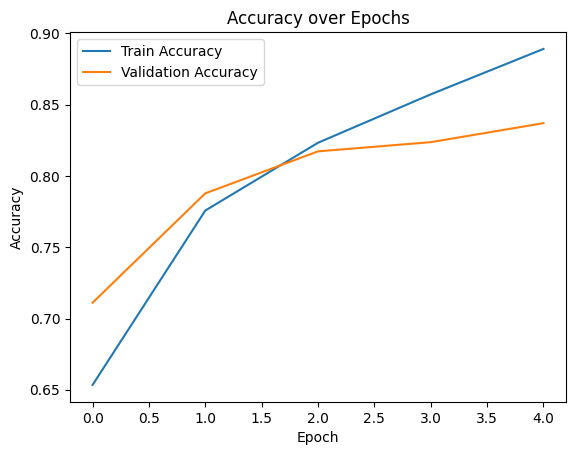

In [15]:
#Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()